In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from spectres import spectres
from scipy.constants import c as speed_of_light
from tqdm import tqdm
import prodimopy.read as pread
from numba import njit
from scipy.stats import kendalltau, spearmanr, pearsonr
from scipy.signal import correlate, fftconvolve
from scipy.optimize import minimize

In [100]:
def total_flux(wl, flux_nu):
    """
    Calculate the total flux over the wavelengths and returns the flux in erg cm^-2 s^-1
    """
    flux_lambda = (speed_of_light * 100 / ((wl * 1e-4) ** 2)) * flux_nu * 1e-23
    tot_flux = np.trapezoid(flux_lambda, (wl * 1e-4))
    return tot_flux


def add_noise(flux, SNR):
    """
    SNR = flux/sigma
    """
    noise_level = np.min(flux) / SNR
    noise = np.random.normal(0, noise_level, size=flux.shape)
    return flux + noise


In [101]:
cmap = mpl.colormaps.get_cmap('tab20')

In [102]:
with open('FLiTsData1000_N.pkl', 'rb') as f:
    df = pickle.load(f)

In [103]:
data = []
species = ['atomic', 'C2H2', 'CH4', 'CO', 'CO2', 'H2O', 'HCN', 'NH3', 'NO', 'O2', 'OH']
for i, row in df.iterrows():
    fluxes = []
    for specie in species:
        fluxes.append(total_flux(row[f'FLiTs {specie} Wavelength'], row[f'FLiTs {specie} Flux']))
    data.append(fluxes)
df_FLiTs_flux = pd.DataFrame(data, columns=species)

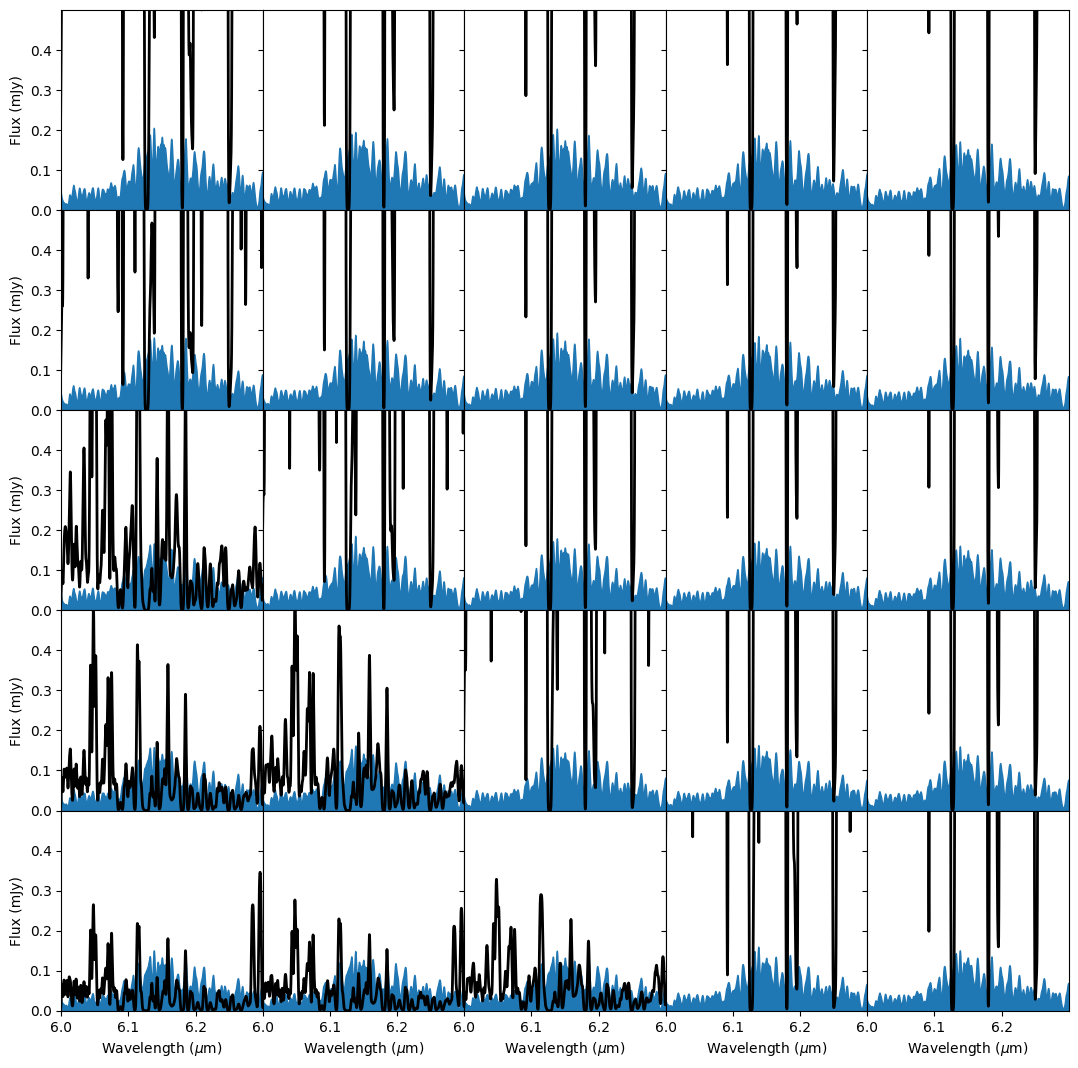

In [104]:
species =['NH3']
fig = plt.figure(figsize=(13, 13))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[6, 6.3]
yrange=[0,0.5]
num_xticks = 4
num_yticks = 6
total_spec= None
for i, row in df.iterrows():
    n_row, n_col = divmod(i, 5)
    total_flux = row['FLiTs Flux']
    total_wl = row['FLiTs Wavelength']
    for index, specie in enumerate(species):
        specie_flux = row[f'FLiTs {specie} Flux']
        specie_wl = row[f'FLiTs {specie} Wavelength']
        # new_specie_flux = np.interp(total_wl, NH3_wl, NH3_flux, left=0, right=0)
        # if total_spec is None:
        #     total_spec = new_specie_flux
        # else:
        #     total_spec += new_specie_flux
        axes[i].fill_between(specie_wl, 0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
                        color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[i].plot(total_wl, total_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[i].set_xlim(xrange)
    axes[i].set_ylim(yrange)
    if n_col == 0:
        axes[i].set_ylabel("Flux (mJy)")
        axes[i].set_yticks(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
        axes[i].set_yticklabels(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
    if n_row == 4:
        axes[i].set_xlabel(r"Wavelength ($\mu$m)")
        axes[i].set_xticks(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
        axes[i].set_xticklabels(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
# plt.legend()
plt.show()

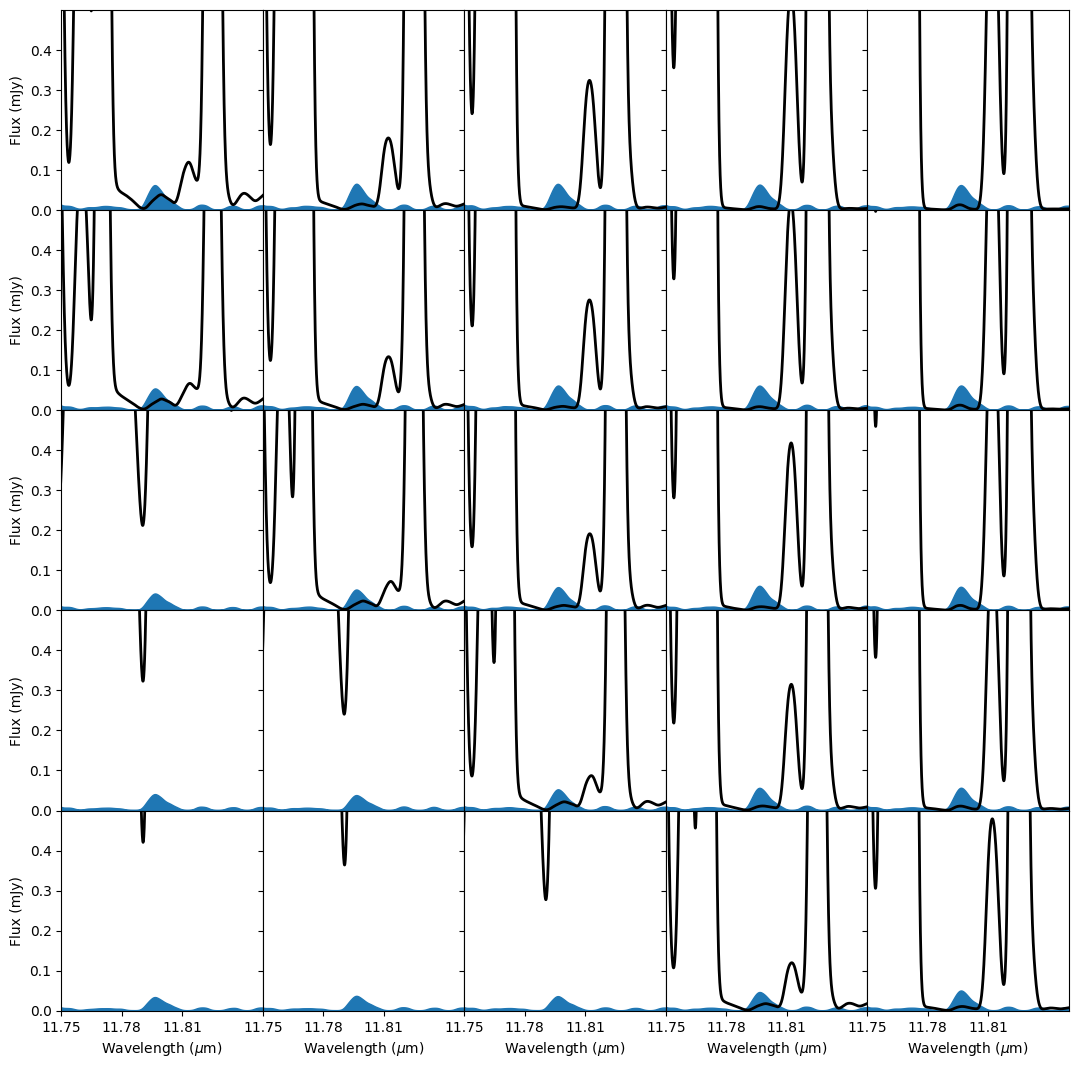

In [105]:
species =['NH3']
fig = plt.figure(figsize=(13, 13))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[11.75, 11.85]
yrange=[0,0.5]
num_xticks = 4
num_yticks = 6
total_spec= None
for i, row in df.iterrows():
    n_row, n_col = divmod(i, 5)
    total_flux = row['FLiTs Flux']
    total_wl = row['FLiTs Wavelength']
    for index, specie in enumerate(species):
        specie_flux = row[f'FLiTs {specie} Flux']
        specie_wl = row[f'FLiTs {specie} Wavelength']
        # new_specie_flux = np.interp(total_wl, NH3_wl, NH3_flux, left=0, right=0)
        # if total_spec is None:
        #     total_spec = new_specie_flux
        # else:
        #     total_spec += new_specie_flux
        axes[i].fill_between(specie_wl, 0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
                        color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[i].plot(total_wl, total_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[i].set_xlim(xrange)
    axes[i].set_ylim(yrange)
    if n_col == 0:
        axes[i].set_ylabel("Flux (mJy)")
        axes[i].set_yticks(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
        axes[i].set_yticklabels(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
    if n_row == 4:
        axes[i].set_xlabel(r"Wavelength ($\mu$m)")
        axes[i].set_xticks(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
        axes[i].set_xticklabels(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
# plt.legend()
plt.show()

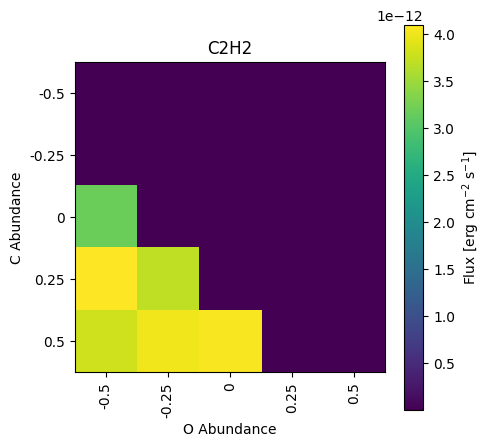

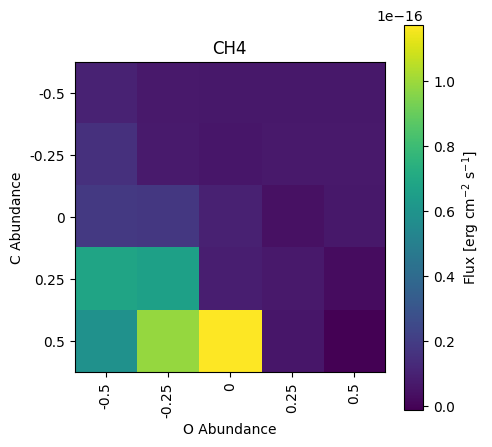

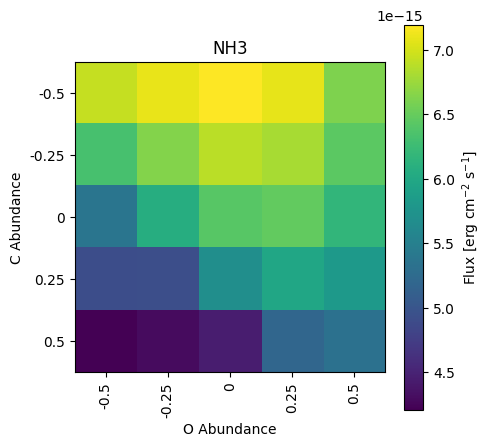

In [106]:
for specie in ['C2H2', 'CH4', 'NH3']:
    plt.figure(figsize=(5, 5))
    plt.imshow(df_FLiTs_flux[specie].values.reshape(5,5), cmap='viridis')
    plt.title(specie)
    plt.xticks(ticks=np.arange(5), labels=[-0.5, -0.25, 0, 0.25, 0.5], rotation=90)
    plt.yticks(ticks=np.arange(5), labels=[-0.5, -0.25, 0, 0.25, 0.5])
    plt.xlabel('O Abundance')
    plt.ylabel('C Abundance')
    plt.colorbar(label='Flux [erg cm$^{-2}$ s$^{-1}$]')
    plt.show()

READ: Reading File:  gdr_1000_N/C_0.5_O_-0.5_CO_4.57\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_0.5_O_-0.5_CO_4.57\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


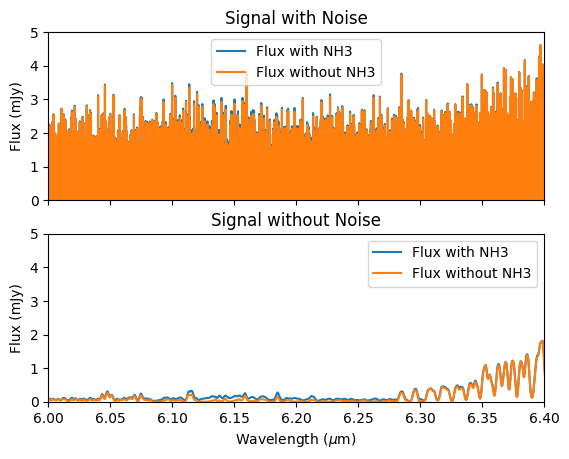

In [107]:
model_index = 20
model_flits = pread.read_FLiTs('gdr_1000_N/' + df['Model Name'][model_index], filename='specFLiTs1.out')
wl, flux_without_NH3, flux_cont = model_flits.convolve(3000, contReturn=True)

NH3_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)
NH3_flux = np.interp(wl, NH3_wl, NH3_flux)
NH3_flux_cont = np.interp(wl, NH3_wl, NH3_flux_cont)
flux_with_NH3 = flux_without_NH3 + NH3_flux - NH3_flux_cont

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

np.random.seed(42)
noise_flux = add_noise(flux_with_NH3, 300)
ax1.plot(wl, (noise_flux - flux_cont) * 1000, label='Flux with NH3')

np.random.seed(42)
noise_flux = add_noise(flux_without_NH3, 300)
ax1.plot(wl, (noise_flux - flux_cont) * 1000, label='Flux without NH3')

ax1.set_title('Signal with Noise')
ax1.set_ylabel('Flux (mJy)')
ax1.set_xlim(6, 6.4)
ax1.set_ylim(0, 5)
ax1.legend()

ax2.plot(wl, (flux_with_NH3 - flux_cont) * 1000, label='Flux with NH3')
ax2.plot(wl, (flux_without_NH3 - flux_cont) * 1000, label='Flux without NH3')
ax2.set_title('Signal without Noise')
ax2.set_xlabel(r'Wavelength ($\mu$m)')
ax2.set_ylabel('Flux (mJy)')
ax2.legend()
plt.show()

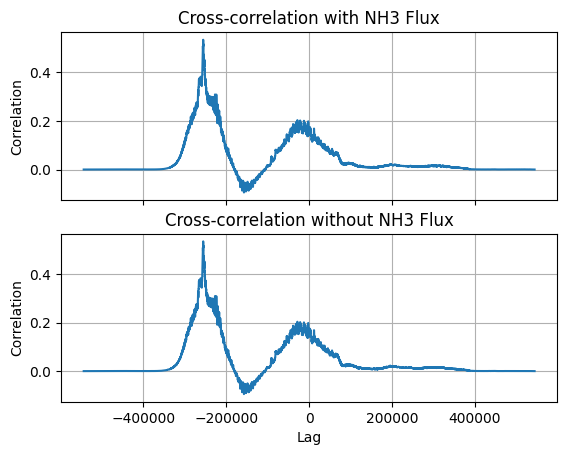

In [108]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

np.random.seed(42)
noise_flux = add_noise(flux_with_NH3, 300)
cc1 = fftconvolve((NH3_flux - NH3_flux_cont), (noise_flux - flux_cont)[::-1], mode='full')
lags = np.arange(-len(noise_flux)+1, len(NH3_flux))
ax1.plot(lags, cc1)
ax1.set_title("Cross-correlation with NH3 Flux")
ax1.set_ylabel("Correlation")
ax1.grid(True)


np.random.seed(42)
noise_flux = add_noise(flux_without_NH3, 300)
cc2 = fftconvolve((NH3_flux - NH3_flux_cont), (noise_flux - flux_cont)[::-1], mode='full')
lags = np.arange(-len(noise_flux)+1, len(NH3_flux))
ax2.plot(lags, cc2)
ax2.set_title("Cross-correlation without NH3 Flux")
ax2.set_xlabel("Lag")
ax2.set_ylabel("Correlation")
ax2.grid(True)
plt.show()

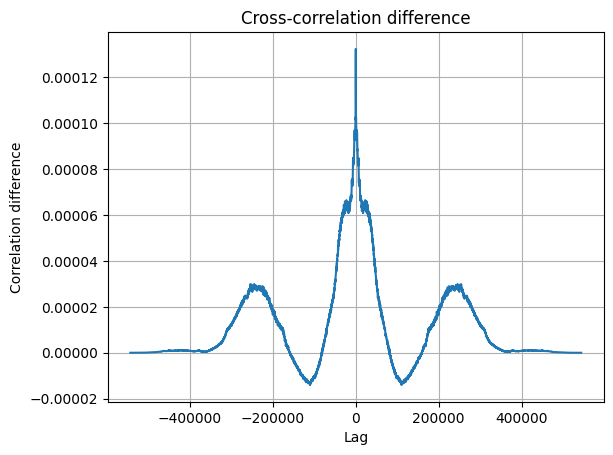

In [109]:
# Plotting the difference between the crosscorrelations
plt.plot(lags, cc1-cc2)
plt.title("Cross-correlation difference")
plt.xlabel("Lag")
plt.ylabel("Correlation difference")
plt.grid(True)
plt.show()

In [110]:
# Making all the arrays on a uniform wavelength grid
wl_uniform = np.linspace(min(wl), max(wl), len(wl))
flux_without_NH3_uniform = np.interp(wl_uniform, wl, flux_without_NH3)
flux_with_NH3_uniform = np.interp(wl_uniform, wl, flux_with_NH3)
flux_cont_uniform = np.interp(wl_uniform, wl, flux_cont)
np.random.seed(42)
noise_flux_with_NH3_uniform = add_noise(flux_with_NH3_uniform, 300)
NH3_flux_uniform = np.interp(wl_uniform, wl, NH3_flux)
NH3_flux_cont_uniform = np.interp(wl_uniform, wl, NH3_flux_cont)
np.random.seed(42)
noise_flux_without_NH3_uniform = add_noise(flux_without_NH3_uniform, 300)

NH3_flux_uniform -= NH3_flux_cont_uniform
noise_flux_with_NH3_uniform -= flux_cont_uniform
noise_flux_without_NH3_uniform -= flux_cont_uniform

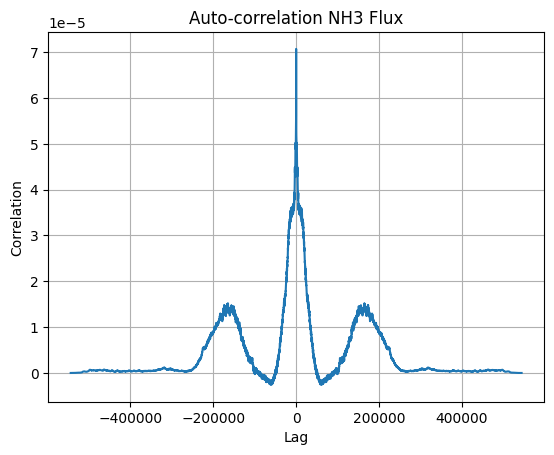

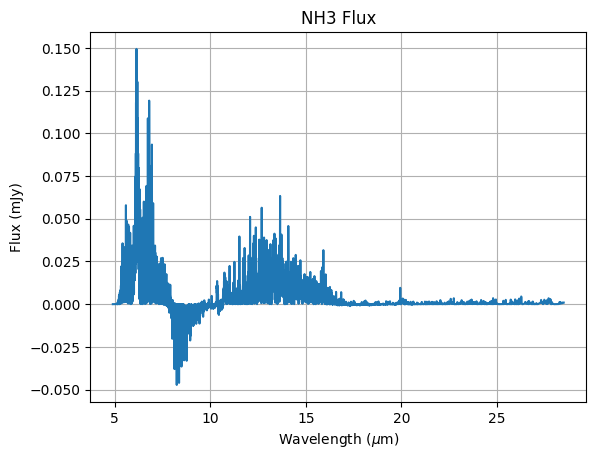

In [111]:
ac = fftconvolve(NH3_flux_uniform, NH3_flux_uniform[::-1], mode='full')
lags = np.arange(-len(NH3_flux_uniform)+1, len(NH3_flux_uniform))

# Plotting the autocorrelation of NH3
plt.plot(lags, ac)
plt.title('Auto-correlation NH3 Flux')
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

# Plotting NH3
plt.plot(wl_uniform, NH3_flux_uniform*1000)
plt.title("NH3 Flux")
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Flux (mJy)')
plt.grid(True)
plt.show()

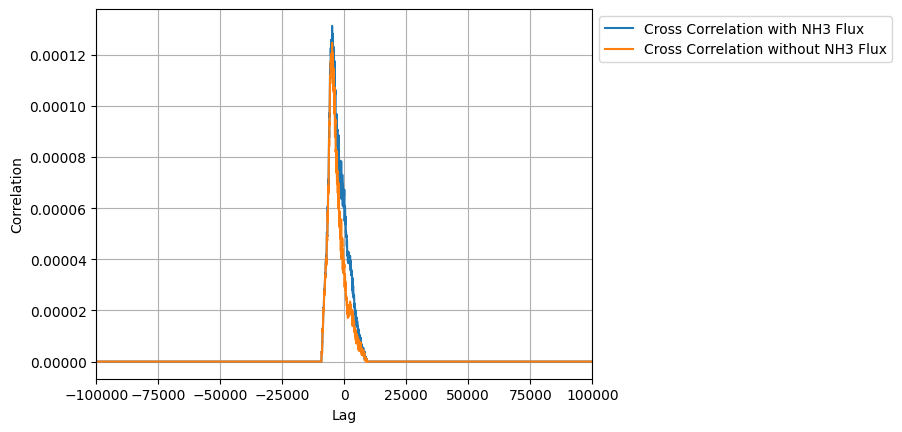

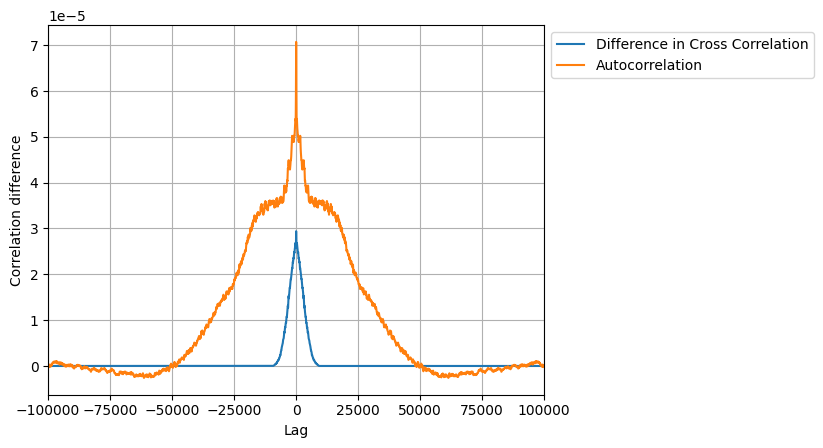

In [112]:
new_noise_flux = noise_flux_with_NH3_uniform.copy()
new_NH3_flux = NH3_flux_uniform.copy()
new_noise_wout_NH3_flux = noise_flux_without_NH3_uniform.copy()

wl_mask = (wl_uniform < 6) | (wl_uniform > 6.4)
flux_treshold = 0.1

# Masking the array
new_noise_flux[wl_mask] = 0
new_noise_flux[new_noise_flux>flux_treshold] = 0
new_NH3_flux[wl_mask] = 0
new_noise_wout_NH3_flux[wl_mask] = 0
new_noise_wout_NH3_flux[new_noise_wout_NH3_flux>flux_treshold] = 0

# Calculating the crosscorrelation
cc_with = fftconvolve((new_NH3_flux), (new_noise_flux)[::-1], mode='full')
cc_without = fftconvolve((new_NH3_flux), (new_noise_wout_NH3_flux)[::-1], mode='full')

# Comparing the crosscorrelations for the signals with and without NH3
plt.plot(lags, cc_with, label='Cross Correlation with NH3 Flux')
plt.plot(lags, cc_without, label='Cross Correlation without NH3 Flux')
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(-100000, 100000)
plt.show()

# Comparing the difference and the autocorrelation
plt.plot(lags, cc_with - cc_without, label='Difference in Cross Correlation')
plt.plot(lags, ac, label='Autocorrelation')
plt.xlabel("Lag")
plt.ylabel("Correlation difference")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(-100000, 100000)
plt.show()

In [113]:
def difference(params):
    a,b,c = params
    new_noise_flux = noise_flux_with_NH3_uniform.copy()
    new_NH3_flux = NH3_flux_uniform.copy()
    new_noise_wout_NH3_flux = noise_flux_without_NH3_uniform.copy()

    wl_mask = (wl_uniform < a) | (wl_uniform > b)
    flux_treshold = c

    new_noise_flux[wl_mask] = 0
    new_noise_flux[new_noise_flux>flux_treshold] = 0
    new_NH3_flux[wl_mask] = 0
    # new_NH3_flux[new_NH3_flux>flux_treshold] = 0
    new_noise_wout_NH3_flux[wl_mask] = 0
    new_noise_wout_NH3_flux[new_noise_wout_NH3_flux>flux_treshold] = 0

    cc_with = fftconvolve((new_NH3_flux), (new_noise_flux)[::-1], mode='full')
    cc_without = fftconvolve((new_NH3_flux), (new_noise_wout_NH3_flux)[::-1], mode='full')
    return -abs(cc_with[lags==0]-cc_without[lags==0])/abs(b-a+1)

initial_guess = [6, 6.4, 0.1]

result = minimize(difference, initial_guess, method='Nelder-Mead')

best_params = result.x

[6.0450756  6.3024475  0.10686546]


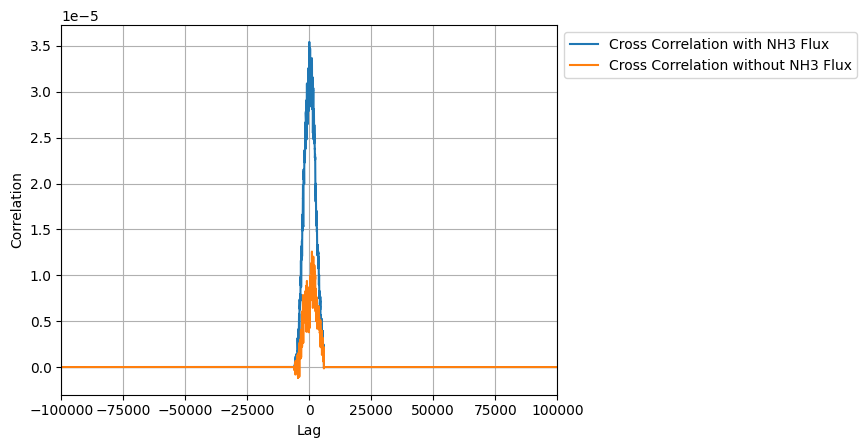

In [115]:
print(best_params)
new_noise_flux = noise_flux_with_NH3_uniform.copy()
new_NH3_flux = NH3_flux_uniform.copy()
new_noise_wout_NH3_flux = noise_flux_without_NH3_uniform.copy()

wl_mask = (wl_uniform < best_params[0]) | (wl_uniform > best_params[1])
flux_treshold = best_params[2]

new_noise_flux[wl_mask] = 0
new_noise_flux[new_noise_flux>flux_treshold] = 0
new_NH3_flux[wl_mask] = 0
# new_NH3_flux[new_NH3_flux>flux_treshold] = 0
new_noise_wout_NH3_flux[wl_mask] = 0
new_noise_wout_NH3_flux[new_noise_wout_NH3_flux>flux_treshold] = 0

cc_with = fftconvolve((new_NH3_flux), (new_noise_flux)[::-1], mode='full')
cc_without = fftconvolve((new_NH3_flux), (new_noise_wout_NH3_flux)[::-1], mode='full')
# Comparing the crosscorrelations for the signals with and without NH3
plt.plot(lags, cc_with, label='Cross Correlation with NH3 Flux')
plt.plot(lags, cc_without, label='Cross Correlation without NH3 Flux')
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(-100000, 100000)
plt.show()